Start
Stop


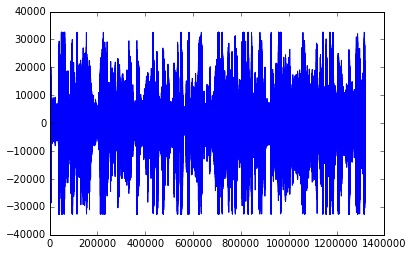

In [5]:
%matplotlib inline
import pyaudio
import wave
import numpy as np
import struct
import matplotlib.pyplot as plt

FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024
samplelen = 1323.0

audio = pyaudio.PyAudio()

# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True,
                frames_per_buffer=CHUNK)
clip = []
print "Start"
for i in range(int(RATE/CHUNK*30)):
    frames = stream.read(CHUNK)
    clip = np.append(clip,np.fromstring(frames, dtype=np.int16))
print "Stop"

plt.figure()
plt.plot(clip)

stream.close()
audio.terminate()

noise_output = wave.open('aashna.wav', 'w')
noise_output.setparams((1, 2, 44100, 0, 'NONE', 'not compressed'))

for value in clip:
        packed_value = struct.pack('h', value)
        noise_output.writeframes(packed_value)
        
noise_output.close()

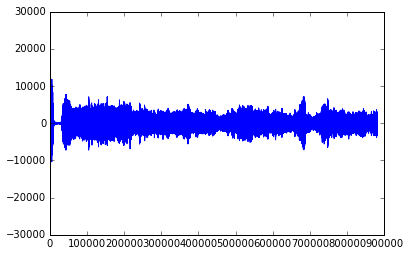

In [23]:

from scipy.io import wavfile
rate, x = wavfile.read('davis2.wav')
plt.figure()
plt.plot(x)